In [211]:
import re
import json
import datetime
import pandas as pd
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
import sys
import os

sys.path.insert(1, '../src/')

from partyset import PartySet
from utils import data_utils

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chrislzc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/chrislzc/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## 2016

In [3]:
os.getcwd()
os.chdir("..")

In [4]:
os.getcwd()

'/Users/chrislzc/Desktop/UCSD/UCSD 2021 WINTER/DSC180B/Election-Sentiment'

In [6]:
os.chdir("data/hydrated_tweets/2016")
os.getcwd()

'/Users/chrislzc/Desktop/UCSD/UCSD 2021 WINTER/DSC180B/Election-Sentiment/data/hydrated_tweets/2016'

In [18]:
files = [name for name in os.listdir('.') if os.path.isfile(name)]

In [19]:
files

['election-filter2.jsonl',
 'election-filter6.jsonl',
 'election-filter4.jsonl',
 'election-filter3.jsonl',
 'election-filter1.jsonl',
 'election-filter5.jsonl']

In [22]:
elec_2016 = []
for i in files:
    with open(i, 'r') as json_file:
        json_list = list(json_file)
    
    for json_str in json_list:
        elec_2016.append(json.loads(json_str)['full_text'])

In [23]:
elec_2016

['RT @funder: #TrumpLeaks begins today.  Everyday til Election Day. Via Democratic Coalition Against Trump - 100,000 members and counting! @K…',
 "Hillary Clinton already has a brutal ad up on Donald Trump's tax-return leak https://t.co/ELH0HSF7Ho via @TheWeek",
 'RT @FrancisGirard72: What a great new idea, just kill everyone who presents a political threat to you-NM I forgot its same old Clinton play…',
 'RT @nytpolitics: Trump\'s old accountant for more than 30 years: "The guy was building incredible net worth and not paying tax on it" https:…',
 '@mistermegative @GodofRawr Dealing with alt-right Trump supporters will do that to you',
 "RT @Fricat: Farage is Trump's mouthpiece! Damning report condemns rising 'racist violence and hate speech' by UK politicians https://t.co/d…",
 'RT @HillaryClinton: Mike Pence has actually signed into law hateful policies like those touted by Donald Trump. https://t.co/0d5C1tBxmc',
 "RT @michaelschaub: KAINE: Mr. Trump is a man\n\nPENCE: Nonsense\n\nK

In [25]:
clean_2016 = [data_utils.clean_text(doc) for doc in elec_2016]

In [27]:
len(clean_2016)

84220

In [66]:
no_retweets = []
count = 0
for i in range(len(clean_2016)):
    if 'rt' not in clean_2016[i]:
        no_retweets.append(clean_2016[i])
        count += 1
#     print(clean_2016[i][0] == 'rt')

In [64]:
len(no_retweets)

128

In [65]:
count/len(clean_2016)

0.001519829019235336

In [74]:
sent_2016 = data_utils.compute_sentiment_scores(clean_2016)

In [79]:
sent_2016.groupby('sentiment_type').count()

text_list  text_string  sentiment_components  sentiment_score
sentiment_type                                                               
Negative            27478        27478                 27478            27478
Neutral             28478        28478                 28478            28478
Positive            28264        28264                 28264            28264

## 2020

In [87]:
os.chdir("..")
os.chdir("2020")
os.getcwd()

'/Users/chrislzc/Desktop/UCSD/UCSD 2021 WINTER/DSC180B/Election-Sentiment/data/hydrated_tweets/2020'

In [88]:
files_2020 = [name for name in os.listdir('.') if os.path.isfile(name)]

In [89]:
files_2020

['2020-10-18_14_ids.jsonl',
 '2020-11-6_12_ids.jsonl',
 '2020-7-27_22_ids.jsonl',
 '2020-11-24_14_ids.jsonl',
 '2020-11-20_5_ids.jsonl',
 '2020-10-22_20_ids.jsonl',
 '2020-8-10_11_ids.jsonl',
 '2020-8-16_17_ids.jsonl',
 '2020-10-2_0_ids.jsonl',
 '2020-10-5_8_ids.jsonl',
 '2020-7-1_16_ids.jsonl',
 '2020-10-31_1_ids.jsonl',
 '2020-8-3_13_ids.jsonl',
 '2020-8-21_11_ids.jsonl',
 '2020-7-28_20_ids.jsonl',
 '2020-8-30_7_ids.jsonl',
 '2020-10-14_15_ids.jsonl',
 '2020-7-24_19_ids.jsonl',
 '2020-9-23_13_ids.jsonl',
 '2020-11-30_14_ids.jsonl',
 '2020-11-21_17_ids.jsonl',
 '2020-10-29_5_ids.jsonl',
 '2020-9-10_2_ids.jsonl',
 '2020-7-3_1_ids.jsonl',
 '2020-7-13_3_ids.jsonl',
 '2020-7-29_7_ids.jsonl',
 '2020-10-28_14_ids.jsonl',
 '2020-11-12_12_ids.jsonl',
 '2020-7-8_21_ids.jsonl',
 '2020-8-7_16_ids.jsonl',
 '2020-10-17_10_ids.jsonl',
 '2020-7-5_0_ids.jsonl',
 '2020-7-25_1_ids.jsonl',
 '2020-11-26_10_ids.jsonl',
 '2020-10-26_22_ids.jsonl',
 '2020-9-4_21_ids.jsonl',
 '2020-7-20_16_ids.jsonl',
 '2020

In [214]:
orig_tweets_2020 = []
sentiment_scores = []
for i in files_2020:
    with open(i, 'r') as json_file:
        json_list = list(json_file)
    dat_2020 = [json.loads(json_str) for json_str in json_list]
    orig_2020 = []
    for j in dat_2020:
        if 'retweeted_status' not in j.keys():
            orig_2020.append(j['full_text'])
    cleaned_2020 = [data_utils.clean_text(doc) for doc in orig_2020]
    orig_tweets_2020.append(cleaned_2020)
    
    sentiment_2020 = data_utils.compute_sentiment_scores(cleaned_2020)
    sentiment_scores = sentiment_2020.sentiment_score.mean()
    

In [215]:
sentiment_scores

-0.07091666666666664

In [208]:
orig_tweets_2020

[[['votebluedownballot'],
  ['please',
   'respond',
   'unified',
   'voice',
   'many',
   'governors',
   'stand',
   'stand',
   'together',
   'denounce',
   'criminal',
   'terrorist',
   'behavior',
   'djt',
   'continued',
   'schocastic',
   'terrorism',
   'support',
   'silent'],
  ['hey',
   'chuck',
   'forced',
   'speak',
   'hunter',
   'biden',
   'emails',
   'used',
   'word',
   'hacked',
   'version',
   'work',
   'hack',
   'could',
   'used',
   'describe',
   'circumstance',
   'used',
   'manner',
   'like',
   'chuck',
   'todd',
   'hack',
   'journalist'],
  ['happy', 'birthday', 'lisa', 'already'],
  ['hahahaha', 'german', 'poll'],
  ['wow', 'well', 'ate', 'kirstie', 'brain'],
  ['great', 'lady', 'thanks'],
  ['omg', 'give', 'crazy', 'qanon', 'base', 'believes'],
  ['let',
   'blame',
   'game',
   'begin',
   'republicans',
   'point',
   'finger',
   'parscale',
   'kushner',
   'stepien',
   'trump',
   'president',
   'team',
   'braces',
   'potentia

In [200]:
for i in files_2020:
    print(i)

2020-10-18_14_ids.jsonl
2020-11-6_12_ids.jsonl
2020-7-27_22_ids.jsonl
2020-11-24_14_ids.jsonl
2020-11-20_5_ids.jsonl
2020-10-22_20_ids.jsonl
2020-8-10_11_ids.jsonl
2020-8-16_17_ids.jsonl
2020-10-2_0_ids.jsonl
2020-10-5_8_ids.jsonl
2020-7-1_16_ids.jsonl
2020-10-31_1_ids.jsonl
2020-8-3_13_ids.jsonl
2020-8-21_11_ids.jsonl
2020-7-28_20_ids.jsonl
2020-8-30_7_ids.jsonl
2020-10-14_15_ids.jsonl
2020-7-24_19_ids.jsonl
2020-9-23_13_ids.jsonl
2020-11-30_14_ids.jsonl
2020-11-21_17_ids.jsonl
2020-10-29_5_ids.jsonl
2020-9-10_2_ids.jsonl
2020-7-3_1_ids.jsonl
2020-7-13_3_ids.jsonl
2020-7-29_7_ids.jsonl
2020-10-28_14_ids.jsonl
2020-11-12_12_ids.jsonl
2020-7-8_21_ids.jsonl
2020-8-7_16_ids.jsonl
2020-10-17_10_ids.jsonl
2020-7-5_0_ids.jsonl
2020-7-25_1_ids.jsonl
2020-11-26_10_ids.jsonl
2020-10-26_22_ids.jsonl
2020-9-4_21_ids.jsonl
2020-7-20_16_ids.jsonl
2020-9-8_15_ids.jsonl
2020-8-25_13_ids.jsonl
2020-9-13_19_ids.jsonl
2020-7-2_19_ids.jsonl
2020-9-29_18_ids.jsonl
2020-11-13_13_ids.jsonl
2020-8-15_8_ids.j

In [ ]:
re.match()

In [213]:
for i in files_2020:
    
    print(i[:-10])
    print(datetime.datetime.strptime(i[:-10], '%Y-%m-%d'))

2020-10-18_14


ValueError: unconverted data remains: _14

In [176]:
lst_name = 'orig_' + files_2020[0][:-10]

In [90]:
elec_2020 = []
for i in files_2020:
    with open(i, 'r') as json_file:
        json_list = list(json_file)
    
    for json_str in json_list:
        elec_2020.append(json.loads(json_str)['full_text'])

In [91]:
elec_2020

['RT @tressiemcphd: Too many Black celebrities are meeting with Trump when I need them to be meeting with Jane Fonda.',
 'RT @scrappymas: El "juvenil" Sergio Fajardo considera que Álvaro Uribe debe retirarse por su edad, mientras que Biden (77) es su favorito p…',
 '@realDonaldTrump #VoteBlueDownBallot',
 '@GovMurphy @GovCTW @NYGovCuomo  please respond with a unified voice - as many governors as will stand up and stand together - to denounce this criminal terrorist behavior and DJT’s continued schocastic terrorism in support. @GOP is silent. https://t.co/a1phRnv4aE',
 'RT @thebradfordfile: Joe Biden needs to register as a foreign agent representing Beijing.',
 '@MeetThePress @mtosterholm Hey Chuck.  When forced to speak about the Hunter Biden emails you used the word "hacked".  There is no version of the work hack that could be used to describe this circumstance but it can be used in a manner like "Chuck Todd is a hack journalist"',
 'Happy Birthday Lisa, and I already did! https://t.c

In [92]:
clean_2020 = [data_utils.clean_text(doc) for doc in elec_2020]

In [93]:
clean_2020

[['rt',
  'many',
  'black',
  'celebrities',
  'meeting',
  'trump',
  'need',
  'meeting',
  'jane',
  'fonda'],
 ['rt',
  'el',
  'juvenil',
  'sergio',
  'fajardo',
  'considera',
  'que',
  'álvaro',
  'uribe',
  'debe',
  'retirarse',
  'por',
  'su',
  'edad',
  'mientras',
  'que',
  'biden',
  'es',
  'su',
  'favorito',
  'p'],
 ['votebluedownballot'],
 ['please',
  'respond',
  'unified',
  'voice',
  'many',
  'governors',
  'stand',
  'stand',
  'together',
  'denounce',
  'criminal',
  'terrorist',
  'behavior',
  'djt',
  'continued',
  'schocastic',
  'terrorism',
  'support',
  'silent'],
 ['rt',
  'joe',
  'biden',
  'needs',
  'register',
  'foreign',
  'agent',
  'representing',
  'beijing'],
 ['hey',
  'chuck',
  'forced',
  'speak',
  'hunter',
  'biden',
  'emails',
  'used',
  'word',
  'hacked',
  'version',
  'work',
  'hack',
  'could',
  'used',
  'describe',
  'circumstance',
  'used',
  'manner',
  'like',
  'chuck',
  'todd',
  'hack',
  'journalist'],
 [

In [94]:
no_retweets_20 = []
count_20 = 0
for i in range(len(clean_2020)):
    if 'rt' not in clean_2020[i]:
        no_retweets_20.append(clean_2020[i])
        count_20 += 1
#     print(clean_2020[i][0] == 'rt')

In [95]:
count/len(clean_2016)

0.4086202802184754

In [96]:
sent_2020 = data_utils.compute_sentiment_scores(clean_2020)

In [97]:
sent_2020.groupby('sentiment_type').count()

text_list  text_string  sentiment_components  sentiment_score
sentiment_type                                                               
Negative            29683        29683                 29683            29683
Neutral             31315        31315                 31315            31315
Positive            31786        31786                 31786            31786

In [111]:
no_ret_2020 = []
for i in clean_2020:
    temp = []
    for j in i:
        if j != 'rt':
            temp.append(j)
    no_ret_2020.append(temp)

In [116]:
sent_no_ret_2020 = data_utils.compute_sentiment_scores(no_retweets_20)

In [117]:
sent_no_ret_2020.groupby('sentiment_type').count()

text_list  text_string  sentiment_components  sentiment_score
sentiment_type                                                               
Negative            11149        11149                 11149            11149
Neutral             12967        12967                 12967            12967
Positive            10711        10711                 10711            10711

## Visualization

In [99]:
import matplotlib.pyplot as plt

In [106]:
labels = 'Negative', 'Neutral', 'Positive'
fracs_16 = [27478, 28478, 28264]
fracs_20 = [29683, 31315, 31786]

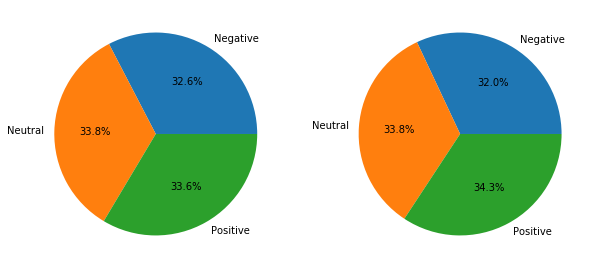

In [107]:
fig, axs = plt.subplots(1, 2, figsize = (10,5))
theme = plt.get_cmap('copper')
axs[0].pie(fracs_16, labels=labels, autopct='%1.1f%%')
axs[1].pie(fracs_20, labels=labels, autopct='%1.1f%%')
plt.show()

In [118]:
labels = 'Negative', 'Neutral', 'Positive'
no_ret_20 = [11149, 12967, 10711]
fracs_20 = [29683, 31315, 31786]

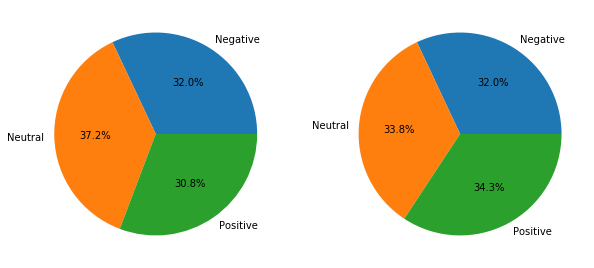

In [119]:
fig, axs = plt.subplots(1, 2, figsize = (10,5))
theme = plt.get_cmap('copper')
axs[0].pie(no_ret_20, labels=labels, autopct='%1.1f%%')
axs[1].pie(fracs_20, labels=labels, autopct='%1.1f%%')
plt.show()

In [98]:
scores_2016 = sent_2016[sent_2016.sentiment_score != 0]
scores_2020 = sent_2020[sent_2020.sentiment_score != 0]

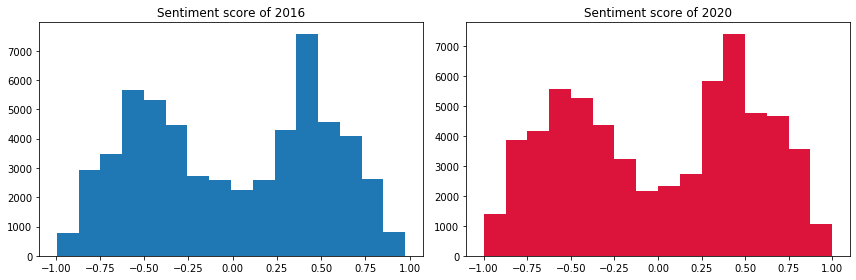

In [105]:
fig, axs = plt.subplots(1, 2, figsize = (12,4), tight_layout=True)
axs[0].hist(scores_2016.sentiment_score, bins = 16)
axs[0].set_title('Sentiment score of 2016')
axs[1].hist(scores_2020.sentiment_score, bins = 16, color='crimson')
axs[1].set_title('Sentiment score of 2020')
plt.show()

In [120]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [123]:
no_ret_2016 = []
for i in clean_2016:
    temp = []
    for j in i:
        if j != 'rt':
            temp.append(j)
    no_ret_2016.append(temp)

In [124]:
# Concact all 2016's tweets to one string
str_2016 = ''
for i in no_ret_2016:
    for j in i:
        str_2016 += j
        str_2016 += ' '
str_2016 = str_2016.rstrip()

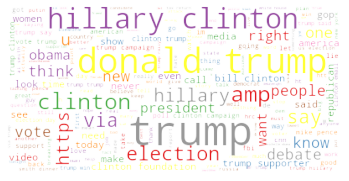

In [125]:
# Create wordcloud of Democrat's tweets
wordcloud = WordCloud(max_font_size=50, colormap='Set1', background_color="rgba(255, 255, 255, 0)", mode="RGBA").generate(str_2016)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [126]:
no_ret_2020 = []
for i in clean_2020:
    temp = []
    for j in i:
        if j != 'rt':
            temp.append(j)
    no_ret_2020.append(temp)

In [127]:
# Concact all 2020's tweets to one string
str_2020 = ''
for i in no_ret_2020:
    for j in i:
        str_2020 += j
        str_2020 += ' '
str_2020 = str_2020.rstrip()

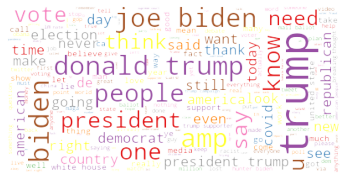

In [128]:
# Create wordcloud of Democrat's tweets
wordcloud = WordCloud(max_font_size=50, colormap='Set1', background_color="rgba(255, 255, 255, 0)", mode="RGBA").generate(str_2020)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

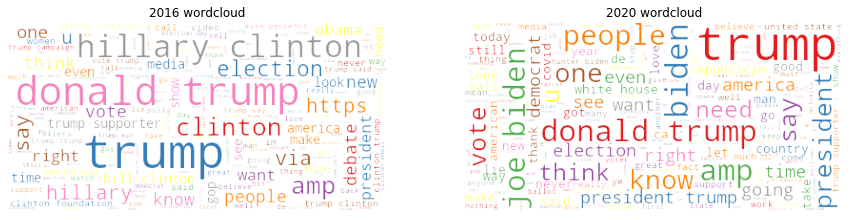

In [130]:
fig, axs = plt.subplots(1, 2, figsize = (15,5))
wordcloud_16 = WordCloud(max_font_size=50, colormap='Set1', background_color="rgba(255, 255, 255, 0)", mode="RGBA").generate(str_2016)
wordcloud_20 = WordCloud(max_font_size=50, colormap='Set1', background_color="rgba(255, 255, 255, 0)", mode="RGBA").generate(str_2020)
axs[0].imshow(wordcloud_16, interpolation="bilinear")
axs[0].axis('off')
axs[0].set_title('2016 wordcloud')
axs[1].imshow(wordcloud_20, interpolation="bilinear")
axs[1].axis('off')
axs[1].set_title('2020 wordcloud')
plt.show()
